In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

contacts_pre_2017=pd.read_csv('Contacts_Pre_2017.csv')

In [3]:
VI = contacts_pre_2017.loc[contacts_pre_2017['CONTACT.TYPE'] == 'Visit']

In [4]:

contacts2017=pd.read_csv('Contacts2017.csv')

In [8]:
VII = contacts2017.loc[contacts2017['CONTACT.TYPE'] == 'Visit']

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


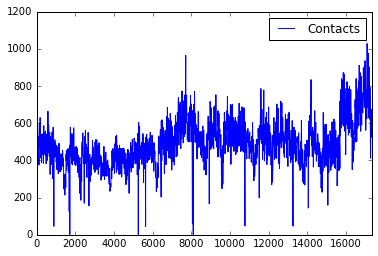

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


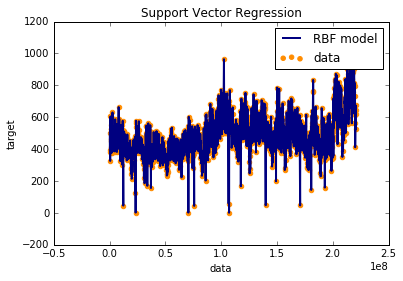

0.0100000389914


['VI.pkl']

In [6]:
FI = VI
FI.head()
import datetime
FI['START.DATE'] = FI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
FI.plot()
plt.show()
FI['NEW_SECONDS'] = FI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI.groupby(['NEW_SECONDS'],as_index=False).sum()
sum_fin.to_csv("VI_Seconds.csv")
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values

#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)
from sklearn.externals import joblib
joblib.dump(svr_rbf, 'VI.pkl') 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


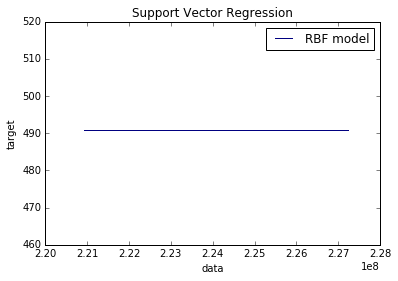

In [9]:
FI = VII
FI.head()
import datetime
FI['Date'] = FI['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
FI['NEW_SECONDS'] = FI['Date'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI['NEW_SECONDS']
sum_fin.to_csv("VI_test_Seconds.csv")
clf = joblib.load('VI.pkl')
X =  FI['NEW_SECONDS'].values
X = X.reshape(-1, 1)

val = clf.predict(X)

#plt.scatter(X, val, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, val, color='navy', label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

d_f_S = {"ID": FI.ID,"Contacts":val}
dfff = pd.DataFrame(data=d_f_S)
dfff.head()
dfff.to_csv("sol_VI.csv",index=False)

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
FI = VI
FI.head()
import datetime
#FI['START.DATE'] = FI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#FI.plot()
#plt.show()
#FI['NEW_SECONDS'] = FI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI.groupby(['NEW_SECONDS'],as_index=False).sum()
sum_fin.to_csv("VI_Seconds.csv")
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values


size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 3117154202.826


NameError: name 'pyplot' is not defined

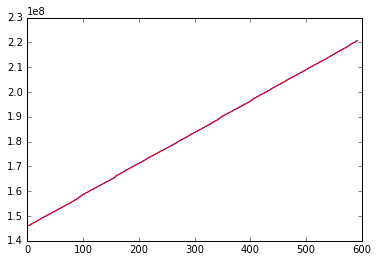

In [17]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [18]:
predictions

[array([  1.45691816e+08]),
 array([  1.45796105e+08]),
 array([  1.46155041e+08]),
 array([  1.46170164e+08]),
 array([  1.46275551e+08]),
 array([  1.46390141e+08]),
 array([  1.46631232e+08]),
 array([  1.46709870e+08]),
 array([  1.46802478e+08]),
 array([  1.46901429e+08]),
 array([  1.47006469e+08]),
 array([  1.47196075e+08]),
 array([  1.47314644e+08]),
 array([  1.47407237e+08]),
 array([  1.47506151e+08]),
 array([  1.47611123e+08]),
 array([  1.47800977e+08]),
 array([  1.47919418e+08]),
 array([  1.48011997e+08]),
 array([  1.48110874e+08]),
 array([  1.48271715e+08]),
 array([  1.48577039e+08]),
 array([  1.48595609e+08]),
 array([  1.48704278e+08]),
 array([  1.48860979e+08]),
 array([  1.49010430e+08]),
 array([  1.49129219e+08]),
 array([  1.49221586e+08]),
 array([  1.49320741e+08]),
 array([  1.49425713e+08]),
 array([  1.49615331e+08]),
 array([  1.49733993e+08]),
 array([  1.49826346e+08]),
 array([  1.49925463e+08]),
 array([  1.50030369e+08]),
 array([  1.50220231

In [19]:
test

array([  1.45670400e+08,   1.46016000e+08,   1.46102400e+08,
         1.46188800e+08,   1.46275200e+08,   1.46361600e+08,
         1.46620800e+08,   1.46707200e+08,   1.46793600e+08,
         1.46880000e+08,   1.46966400e+08,   1.47225600e+08,
         1.47312000e+08,   1.47398400e+08,   1.47484800e+08,
         1.47571200e+08,   1.47830400e+08,   1.47916800e+08,
         1.48003200e+08,   1.48176000e+08,   1.48435200e+08,
         1.48521600e+08,   1.48608000e+08,   1.48694400e+08,
         1.48780800e+08,   1.49040000e+08,   1.49126400e+08,
         1.49212800e+08,   1.49299200e+08,   1.49385600e+08,
         1.49644800e+08,   1.49731200e+08,   1.49817600e+08,
         1.49904000e+08,   1.49990400e+08,   1.50249600e+08,
         1.50336000e+08,   1.50422400e+08,   1.50508800e+08,
         1.50595200e+08,   1.50854400e+08,   1.50940800e+08,
         1.51027200e+08,   1.51113600e+08,   1.51200000e+08,
         1.51459200e+08,   1.51545600e+08,   1.51632000e+08,
         1.51718400e+08,

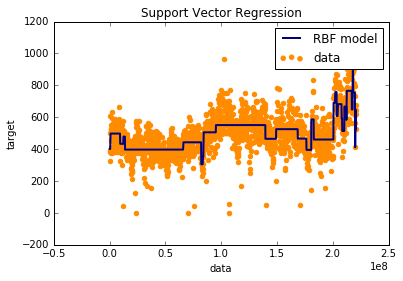

7034.45347879


In [22]:
FI = VI
FI.head()
import datetime
#FI['START.DATE'] = FI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#FI.plot()
#plt.show()
#FI['NEW_SECONDS'] = FI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI.groupby(['NEW_SECONDS'],as_index=False).sum()
sum_fin.to_csv("VI_Seconds.csv")
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values
from sklearn.tree import DecisionTreeRegressor
svr_rbf = DecisionTreeRegressor(max_depth=5)
#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)
from sklearn.externals import joblib
#joblib.dump(svr_rbf, 'VI.pkl') 

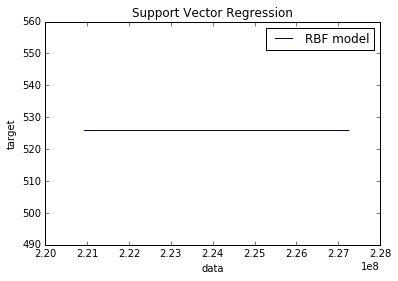

,Contacts,ID
296,526.0,297
297,526.0,298
298,526.0,299
299,526.0,300
300,526.0,301


In [24]:
FI = VII
FI.head()
import datetime
#FI['Date'] = FI['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#FI['NEW_SECONDS'] = FI['Date'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI['NEW_SECONDS']
sum_fin.to_csv("VI_test_Seconds.csv")
clf = svr_rbf
X =  FI['NEW_SECONDS'].values
X = X.reshape(-1, 1)

val = clf.predict(X)

#plt.scatter(X, val, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, val, color='navy', label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

d_f_S = {"ID": FI.ID,"Contacts":val}
dfff = pd.DataFrame(data=d_f_S)
dfff.head()
#dfff.to_csv("sol_VI.csv",index=False)

In [25]:
VI.mean()

Contacts       4.908458e+02
NEW_SECONDS    1.102977e+08
dtype: float64

In [26]:
dfff.to_csv("sol_VI2.csv",index=False)